In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('mascarado.csv')

In [3]:
df = df[['Area_Criadora_Evento','Area_Solucionadora','UF','Segmentacao_Cliente','Nivel_1','Nivel_2','Nivel_3','Acao_Resolucao','contrato','Nome_tecnologia_aparelho']]


In [4]:
df

,Area_Criadora_Evento,Area_Solucionadora,UF,Segmentacao_Cliente,Nivel_1,Nivel_2,Nivel_3,Acao_Resolucao,contrato,Nome_tecnologia_aparelho
0,Area_1,Area_1,RJ,Seg_1,N1_1,N2_1,N3_1,AR_1,Contr_1,3G - WCDMA (UMTS)
1,Area_2,Area_1,RJ,Seg_1,N1_1,N2_1,N3_1,AR_1,Contr_1,3G - WCDMA (UMTS)
2,Area_3,Area_1,MG,Seg_1,N1_1,N2_1,N3_1,AR_1,Contr_2,3G - WCDMA (UMTS)
3,Area_3,Area_1,PA,Seg_2,N1_1,N2_1,N3_2,AR_1,Contr_3,GSM
4,Area_3,Area_1,SP,Seg_1,N1_1,N2_1,N3_1,AR_1,Contr_2,3G - WCDMA (UMTS)
...,...,...,...,...,...,...,...,...,...,...
46662,Area_3,Area_4,MG,Seg_41,N1_2,N2_2,N3_104,AR_1,Contr_1,Outras
46663,Area_1,Area_4,SP,Seg_2,N1_2,N2_5,N3_3,AR_2,Contr_1,3G - WCDMA (UMTS)
46664,Area_3,Area_18,RJ,Seg_40,N1_1,N2_6,N3_8,AR_1,Contr_2,3G - WCDMA (UMTS)
46665,Area_10,Area_7,RS,Seg_5,N1_2,N2_7,N3_9,AR_6,Contr_2,GSM


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Selecionar colunas categóricas, incluindo 'Nome_tecnologia_aparelho'
categorical_cols = ['Area_Criadora_Evento', 'Area_Solucionadora', 'UF', 'Segmentacao_Cliente',
                    'Nivel_1', 'Nivel_2', 'Nivel_3', 'Acao_Resolucao', 'contrato', 'Nome_tecnologia_aparelho']


label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Salvar o mapeamento de 'Acao_Resolucao'
action_classes_mapping = dict(enumerate(label_encoders['Acao_Resolucao'].classes_))

# Exibir o DataFrame codificado
df.head()



,Area_Criadora_Evento,Area_Solucionadora,UF,Segmentacao_Cliente,Nivel_1,Nivel_2,Nivel_3,Acao_Resolucao,contrato,Nome_tecnologia_aparelho
0,0,0,19,0,0,0,0,0,0,0
1,11,0,19,0,0,0,0,0,0,0
2,22,0,11,0,0,0,0,0,1,0
3,22,0,14,11,0,0,62,0,2,3
4,22,0,26,0,0,0,0,0,1,0


In [6]:
df

,Area_Criadora_Evento,Area_Solucionadora,UF,Segmentacao_Cliente,Nivel_1,Nivel_2,Nivel_3,Acao_Resolucao,contrato,Nome_tecnologia_aparelho
0,0,0,19,0,0,0,0,0,0,0
1,11,0,19,0,0,0,0,0,0,0
2,22,0,11,0,0,0,0,0,1,0
3,22,0,14,11,0,0,62,0,2,3
4,22,0,26,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
46662,22,33,11,35,11,11,6,0,0,4
46663,0,33,26,11,11,44,73,10,0,0
46664,22,9,19,34,0,55,128,0,1,0
46665,1,50,23,38,11,66,139,14,1,3


In [ ]:
from sklearn.model_selection import train_test_split

# coluna target
target_col = 'Acao_Resolucao'

# Separar as features (X) e o target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Divisão dos dados em treino, validação e teste -> 70, 15 e 15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# conjuntos de dados
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de validação:", X_val.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (32666, 9)
Tamanho do conjunto de validação: (7000, 9)
Tamanho do conjunto de teste: (7001, 9)


C:\Users\Eliseu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 560)            │         5,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 560)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 320)            │       179,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        51,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         2,898 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,378 (935.07 KB)

 Trainable params: 239,378 (935.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4033 - loss: 2.4083 - val_accuracy: 0.5364 - val_loss: 1.6379 - learning_rate: 0.0010
Epoch 2/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5231 - loss: 1.6812 - val_accuracy: 0.5657 - val_loss: 1.5229 - learning_rate: 0.0010
Epoch 3/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5557 - loss: 1.5701 - val_accuracy: 0.5647 - val_loss: 1.4801 - learning_rate: 0.0010
Epoch 4/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5637 - loss: 1.5263 - val_accuracy: 0.5773 - val_loss: 1.4489 - learning_rate: 0.0010
Epoch 5/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5673 - loss: 1.4921 - val_accuracy: 0.5797 - val_loss: 1.4216 - learning_rate: 0.0010
Epoch 6/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5781 - loss: 1.4588 - val_accuracy: 0.5837 - val_loss: 1.4012 - learning_rate: 0.0010
Epoch 7/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5757 - loss: 1.

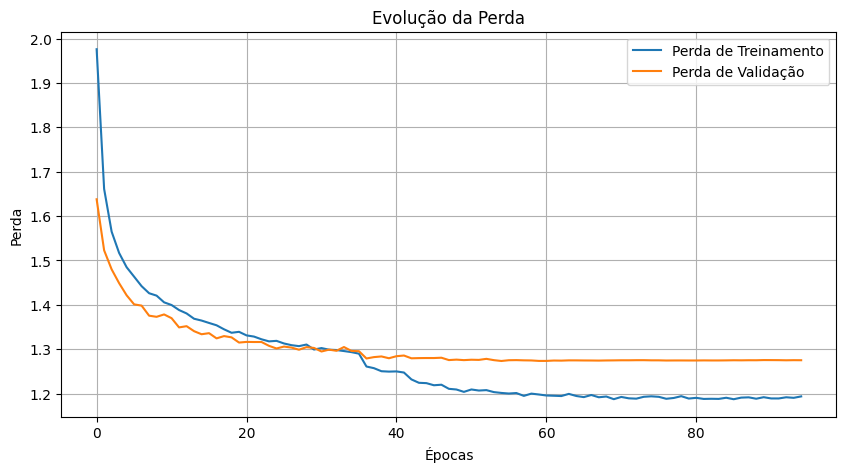

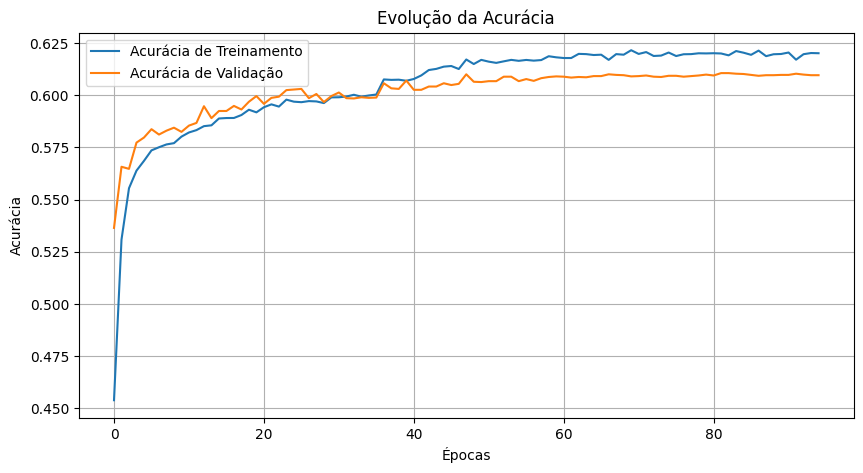

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir o modelo ajustado
model = Sequential()


model.add(Dense(units=560, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(units=320, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(units=160, activation='relu'))
model.add(Dropout(0.2))

# Camada de saída
model.add(Dense(units=len(y.unique()), activation='softmax'))  # Para classificação multiclass

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Definir callbacks para que não tenha muita demora no treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# O modelo
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping,reduce_lr]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Perda no conjunto de teste: {test_loss}')
print(f'Acurácia no conjunto de teste: {test_accuracy}')

import matplotlib.pyplot as plt

# Gráfico da perda
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico da acurácia
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Perda no conjunto de teste: {test_loss}')
print(f'Acurácia no conjunto de teste: {test_accuracy}')


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.6096 - loss: 1.3071
Perda no conjunto de teste: 1.3010472059249878
Acurácia no conjunto de teste: 0.6106270551681519


In [11]:
import numpy as np

In [14]:
import pandas as pd
import numpy as np

# Função de pré-processamento para ajustar as entradas
def pre_process_data(input_df):
    for col in categorical_cols:
        if col in input_df.columns:
            input_df[col] = label_encoders[col].transform(input_df[col])
    # Adiciona colunas ausentes com valor 0
    for col in X_train.columns:
        if col not in input_df.columns:
            input_df[col] = 0  # ou outro valor padrão apropriado
    return input_df

# Função para predições com as duas resoluções mais prováveis
def predict_top_actions(nivel_1, nivel_2, nivel_3, area_criadora, action_classes_mapping, file_path="predictions.txt"):
    input_data = {
        'Nivel_1': [nivel_1],
        'Nivel_2': [nivel_2],
        'Nivel_3': [nivel_3],
        'Area_Criadora_Evento': [area_criadora]
    }
    input_df = pd.DataFrame(input_data)
    
    # Pré-processamento e adição de colunas ausentes
    input_df = pre_process_data(input_df)

    # Ajuste
    input_df = input_df[X_train.columns]  # garante a ordem das colunas
    input_df = input_df.values.reshape((input_df.shape[0], input_df.shape[1]))
    
    # Fazer a predição
    predictions = model.predict(input_df)

    # obter as duas resoluções mais prováveis
    top_2_indices = np.argsort(predictions[0])[-2:][::-1]
    top_2_actions = [action_classes_mapping[idx] for idx in top_2_indices]
    top_2_probabilities = [predictions[0][idx] for idx in top_2_indices]

    # Salvar as resoluções mais prováveis em um arquivo .txt
    with open(file_path, "w", encoding="utf-8") as f:
        f.write("Resoluções mais prováveis:\n")
        for i in range(2):
            f.write(f"{i+1}ª resolução: {top_2_actions[i]} com probabilidade de {top_2_probabilities[i]*100:.2f}%\n")

# Definir os valores de exemplo para os níveis e área criadora do evento, exatamente como foi escrito no csv
nivel_1 = 'N1_1'
nivel_2 = 'N2_1'
nivel_3 = 'N3_1'
area_criadora = 'Area_2'

# Irá criar um txt com as 2 maiores probabilidades, com base nos dados do csv
predict_top_actions(
    nivel_1, 
    nivel_2, 
    nivel_3, 
    area_criadora, 
    action_classes_mapping,
    file_path="predictions.txt"
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
